In [1]:
import os

os.chdir('../../Datasets/')
os.getcwd()

'/Users/brunogutierrez/workspace/tese/Datasets'

# Imports e leitura

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from nltk.tokenize import sent_tokenize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# parâmetros para auxiliar no plot
figsize = (9, 6)
custom_pallete = ['#A71930', '#DF4601', 'yellowgreen', 'green', '#003278']

In [4]:
path = 'b2w-reviews01-main/B2W-Reviews01.csv'

In [5]:
df = pd.read_csv(path)

/var/folders/3v/sxddr7jn42j9jh4kls99hg940000gn/T/ipykernel_36288/3280352130.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


## Dados faltantes

In [6]:
df.shape
# muitos produtos sem marca
# alguns poucos sem review text
df.isna().sum()

(132373, 14)

submission_date              0
reviewer_id                  0
product_id                   0
product_name                84
product_brand            91391
site_category_lv1            6
site_category_lv2         4013
review_title               302
overall_rating               0
recommend_to_a_friend       18
review_text               3275
reviewer_birth_year       5984
reviewer_gender           4136
reviewer_state            3991
dtype: int64

In [7]:
df.sample()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
123435,2018-05-19 12:35:59,8c452cb57d55fdc06fa92f08ef9a04a8bc32a3299812a9...,35522366,Jogo de Toalhas 4 peças 100% Algodão Royal Knu...,NaN,"Cama, Mesa e Banho",Jogo de Banho,Gostei,3,Yes,O produto é ótimo de algodão super macio goste...,1987.0,F,PE


# Perguntas iniciais:
- datas das submissões
- distribuição das avaliações
- categorias de produtos (1° e 2° level)
- distribuição geográfica
- avaliações e recomendações
- número de palavras por avaliação
- léxico de palavras positivas/negativas
- número reviews por produto

### Data de submissão

In [8]:
 df['submission_date'] = pd.to_datetime(df['submission_date'])

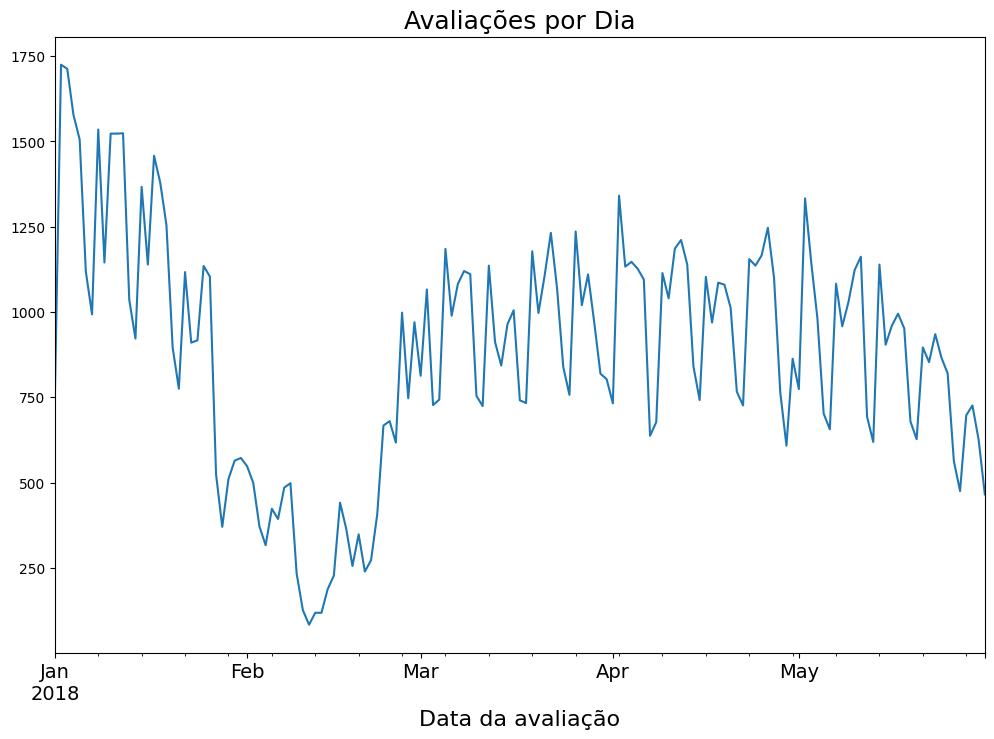

In [10]:
# para tirar a sazonalidade faria o plot por semana
sales_per_day = df.set_index('submission_date').groupby(pd.Grouper(freq='D')).size()
figsize = (12, 8)
_ = sales_per_day.plot(figsize=figsize)
_ = plt.xticks(fontsize=14)
_ = plt.xlabel('Data da avaliação', fontsize=16)
_ = plt.title('Avaliações por Dia', fontsize=18)

### Categoria level 1

In [11]:
print('Número de categorias: ', df['site_category_lv1'].nunique())
df['site_category_lv1'].unique()

Número de categorias:  54


array(['Informática', 'Utilidades Domésticas', 'Eletroportáteis',
       'Brinquedos', 'TV e Home Theater', 'Celulares e Smartphones',
       'Casa e Construção', 'Moda', 'Malas e Acessórios', 'Móveis',
       'Alimentos e Bebidas', 'Automotivo', 'Câmeras e Filmadoras',
       'Vestuário Esportivo', 'Informática e Acessórios', 'Games',
       'Cama, Mesa e Banho', 'Esporte e Lazer', 'Livros',
       'Beleza e Perfumaria', 'Áudio', 'Papelaria', 'Relógios',
       'Instrumentos Musicais', 'Decoração', 'Ferramentas e Jardim',
       'Saúde', 'Filmes e Séries', 'Eletrodomésticos', 'Bebês',
       'Suplementos e Vitaminas', 'Ar-condicionado e Aquecedores',
       'Pet Shop', 'Telefonia Fixa', 'Linha Industrial',
       'Enfeites de Natal', 'Miscellaneous', 'Wearable',
       'Agro, Indústria e Comércio', 'Música', 'Artigos de Festas',
       'Indústria, Comércio e Negócios', 'Sinalização e Segurança',
       'Livros Importados', 'Artigos de Festa', 'Artesanato',
       'DVDs e Blu-ray', 'Bl

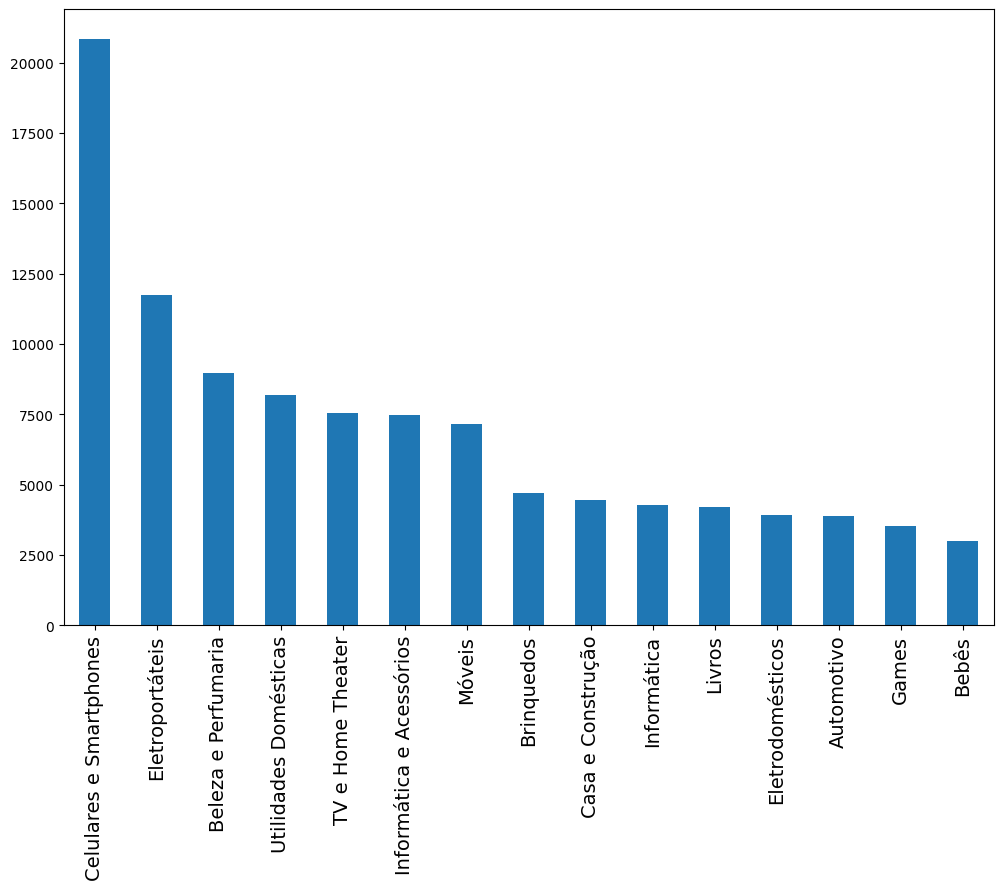

In [12]:
_ = plt.xticks(fontsize=14)
_ = df['site_category_lv1'].value_counts()[:15].plot.bar(figsize=figsize)

### Categoria level 2

In [13]:
df['site_category_lv2'].nunique()

713

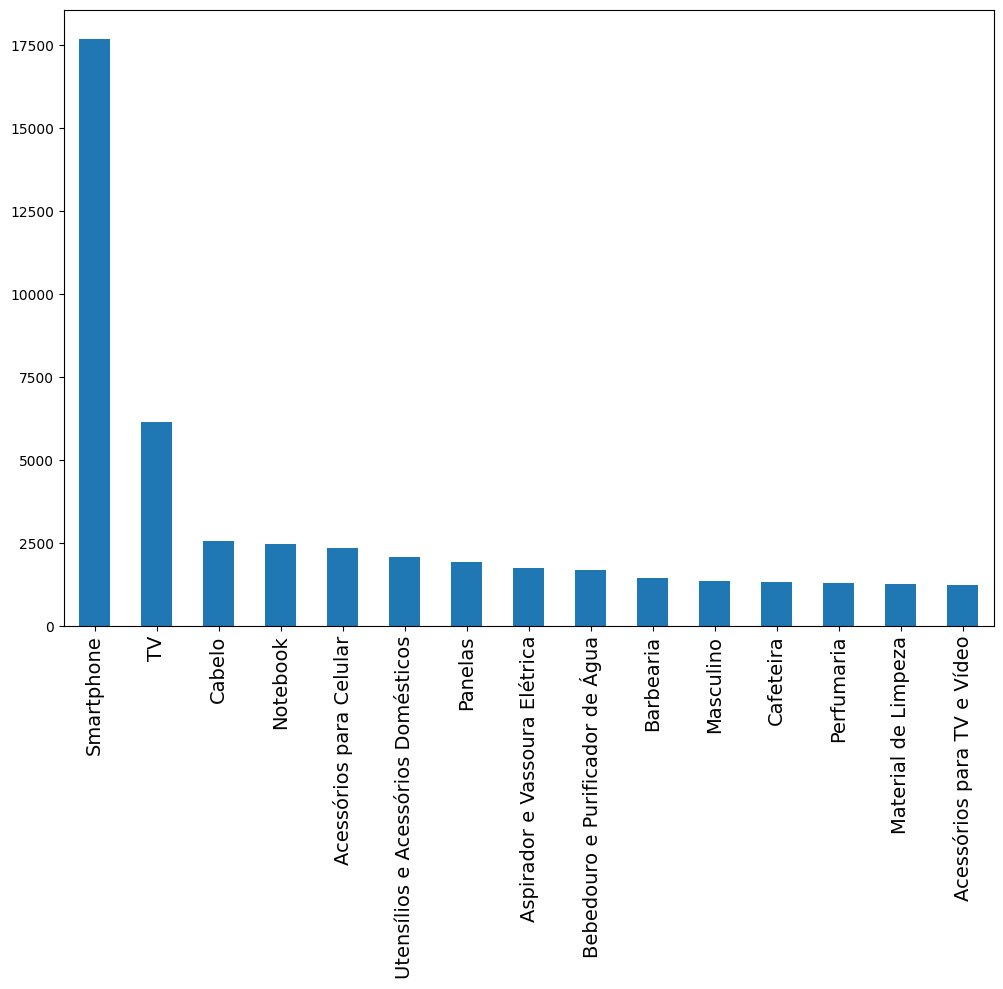

In [14]:
_ = plt.xticks(fontsize=14)
_ = df['site_category_lv2'].value_counts()[:15].plot.bar(figsize=figsize)

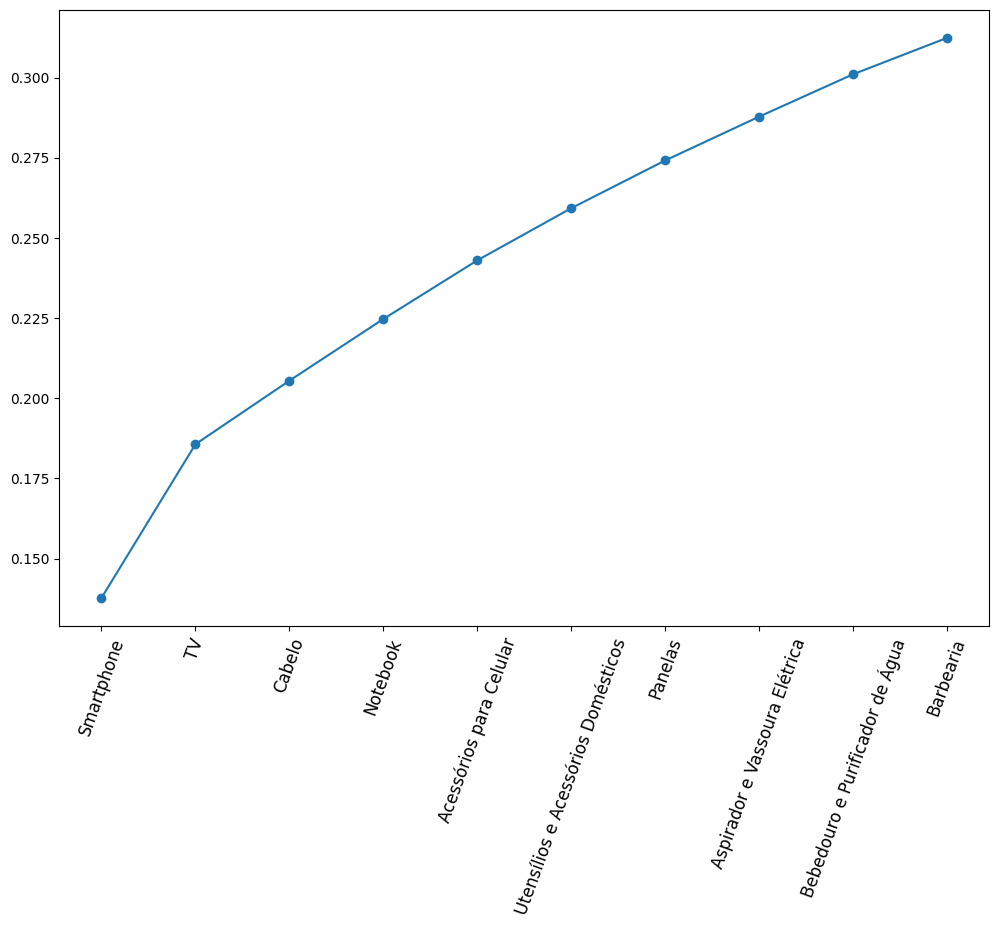

In [15]:
top_n = 10

cumsum_cat2 = df['site_category_lv2'].value_counts(
    normalize=True).cumsum()[:top_n]
_ = cumsum_cat2.plot(figsize=figsize, marker='o')

_ = plt.xticks(labels=list(cumsum_cat2.index), 
                ticks=list(range(0,top_n)), fontsize=12,
              rotation = 70)

### Distribuição dos Scores

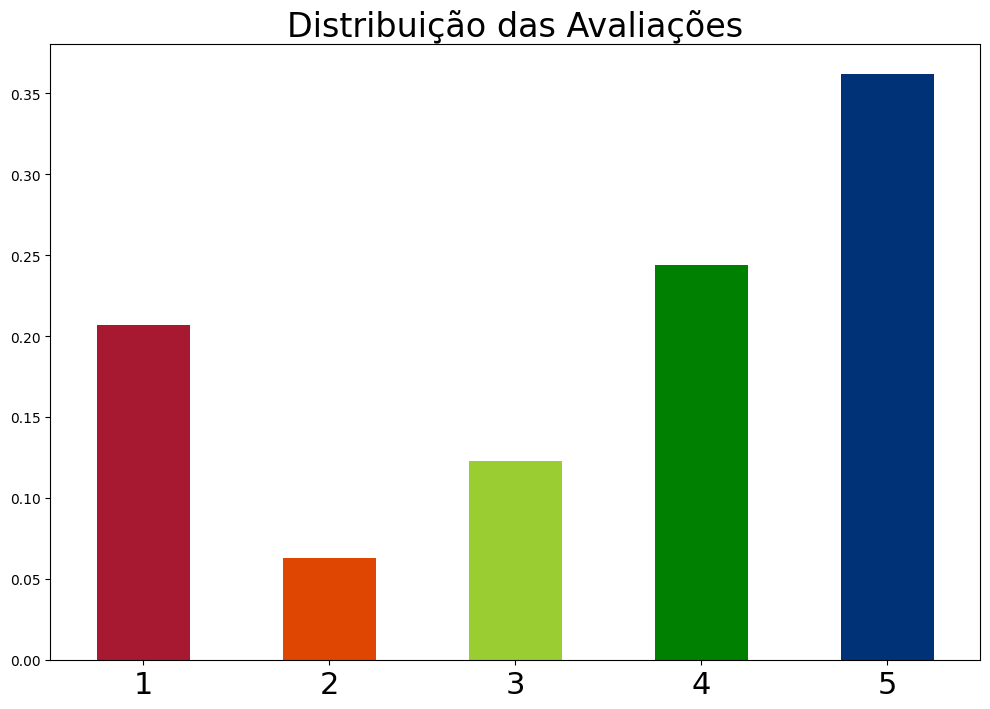

In [16]:
custom_pallete = ['#A71930', '#DF4601', 'yellowgreen', 'green', '#003278']
_ = df['overall_rating'].value_counts(normalize=True).sort_index().plot.bar(figsize=figsize, 
                        color=custom_pallete)
_ = plt.xticks(fontsize=22, rotation=360)
_ = plt.title('Distribuição das Avaliações', fontsize=24)

In [17]:
# score por recomendação do produto
df2 = df.groupby(['overall_rating', 'recommend_to_a_friend'])\
['recommend_to_a_friend'].count().unstack('recommend_to_a_friend').fillna(0)
# normalizar linhas
df2 = df2.div(df2.sum(axis=1), axis=0)

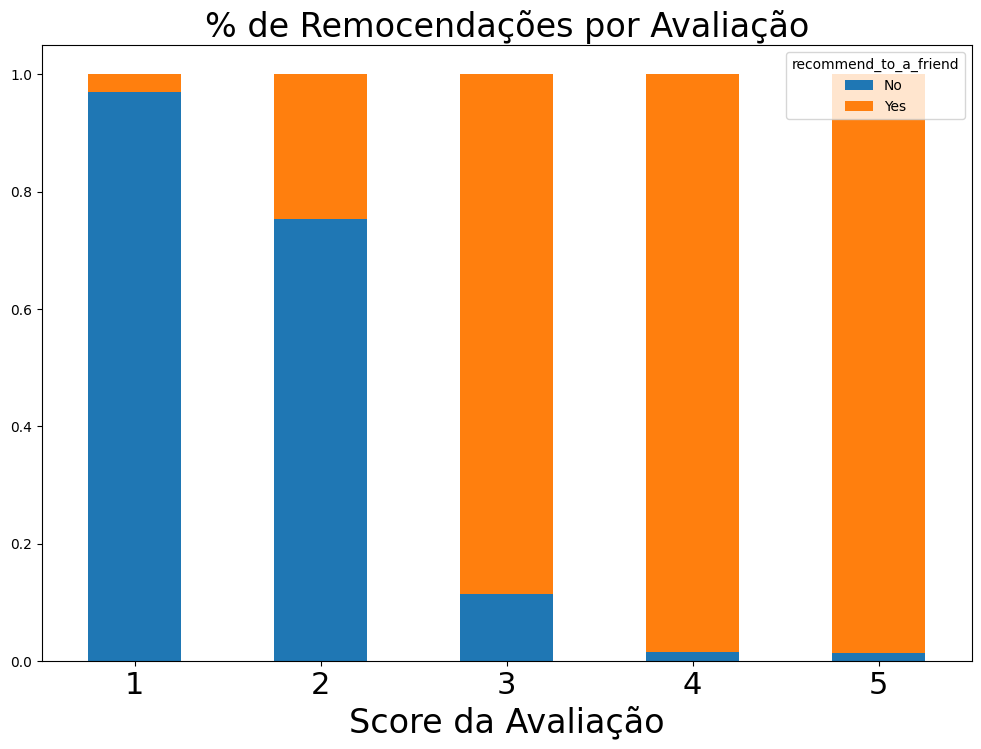

In [18]:
_ = df2.plot(kind='bar', stacked=True, figsize=figsize)
_ = plt.xticks(fontsize=22, rotation=360)
_ = plt.xlabel('Score da Avaliação', fontsize=24)
_ = plt.title('% de Remocendações por Avaliação', fontsize=24)

# Reviews 

Talvez fosse interessante usar um léxico para ser ter ideia de características nos comnetários. Exemplo: quantas vezes aparece as seguintes palavras: moderno, barulho, custo-benefício, cor, ...

Ou quantas vezes aparecem palavras referentes a entrega.

#### Dados faltantes

In [19]:
# poucos dados sem review
len(df)
df['review_text'].isna().sum()
df['review_title'].isna().sum()

132373

3275

302

In [20]:
# Alguns casos em que temos apenas o título da review
df[df['review_text'].isna()].sample()[['review_title', 'review_text', 'overall_rating']]

,review_title,review_text,overall_rating
112361,como avaliar o que não recebi?,NaN,1


#### Agrupar Review Title e Review Text

In [21]:
def count_char(text):
    return len(text) if isinstance(text, str) else 0

In [23]:
# contar número de caracteres em cada coluna
df['n_char_title'] = df['review_title'].apply(count_char)
df['n_char_text'] = df['review_text'].apply(count_char)

df['n_char_title'].describe().round(2)
df['n_char_text'].describe().round(2)

count    132373.00
mean         18.74
std          13.86
min           0.00
25%          10.00
50%          16.00
75%          23.00
max         150.00
Name: n_char_title, dtype: float64

count    132373.00
mean        133.36
std         126.59
min           0.00
25%          66.00
50%          93.00
75%         153.00
max        4548.00
Name: n_char_text, dtype: float64

In [24]:
# Me parece que o mais interessante seria juntar título e texto
# dropando casos em que ambos forem NaN
df = df.dropna(subset=['review_text', 'review_title'], how='all')
# Adicionar ponto entre frases
df['full_review'] = df['review_title'].fillna('') + '. ' + df['review_text'].fillna('')

#### Cálculos de palavras e frases por review

In [4]:
a = 'dff'
a = ''
bool(a)

False

In [25]:
# número de letras
def text_len(x):
    if type(x)==str:
        return len(x)
    else:
        return np.nan

# número de palavras (separando por ' ')
def words_count(x):
    if type(x)==str:
        return len(x.split())
    else:
        return np.nan

# número de frases
def count_phrases(text):
    if type(text) == str:
        return len(sent_tokenize(text, language='portuguese'))
    return 0

In [26]:
# cálculo do número de palavras
df['word_count'] = df['full_review'].apply(words_count).astype(int)

In [27]:
sample = df.sample()
print('Número de palavras: ', sample['word_count'].values[0])
sample['full_review'].values

Número de palavras:  17


array(['Ótimo produto.. Minha cachorrinha adorou, é bem macia . A caminha é grande, ela fica bem confortável.'],
      dtype=object)

In [28]:
# cálculo do número de frases
df['n_sentences'] = df['full_review'].apply(count_phrases).astype(int)

In [29]:
# erros identificados do sent_tokenize
# !!!
# !!
sent_tokenize(df.sample()['review_text'].iloc[0], language='portuguese')

['É tanta utilidade por tão pouco preço, é inacreditável.',
 'Construí uma casa com essa bandeja e ainda estou pagando a faculdade de meus dois filhos com a venda desse maravilhoso produto.',
 'Ela estoca, guarda, esconde e revela, é futurista.',
 'Tem um fecho muito resistente, é quase um cofre!',
 'O frete é quase gratuito, 50 reais pra entregar Isopor?',
 'Está praticamente de graça!',
 'Estocarei sem dúvidas.',
 'Seus filhos vão amar.']

## Média de Palavras por nota da avaliação

In [30]:
# média de palavras dos anúncios que possuem review
round(df['word_count'].mean(),0)

26.0

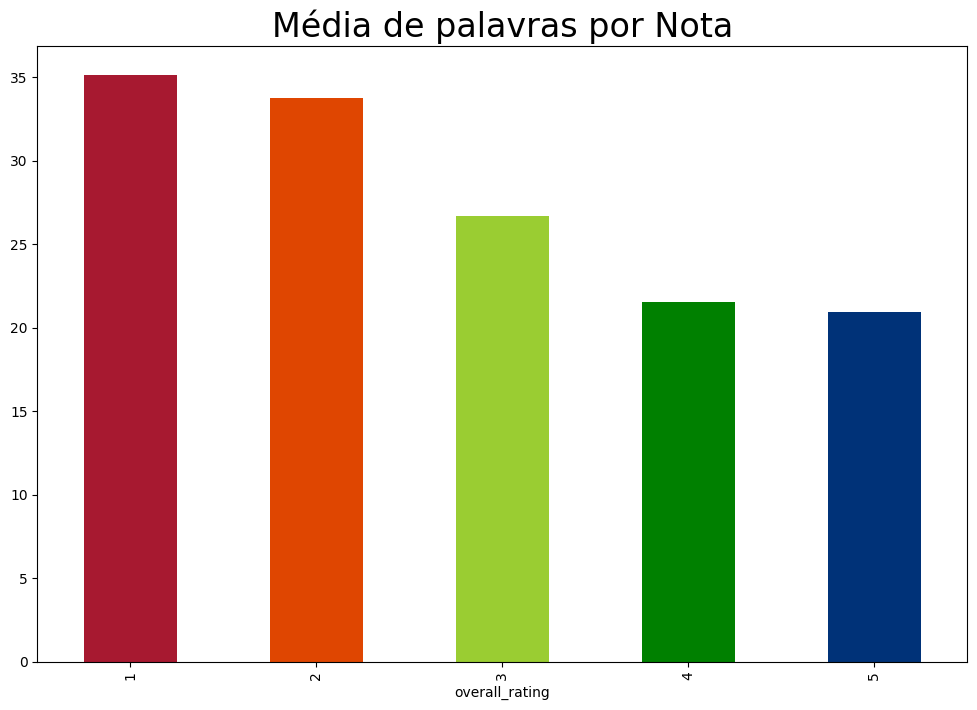

In [31]:
# notas piores costumam ter mais palavras
_ = df.groupby('overall_rating')['word_count'].mean().plot.bar(color=custom_pallete, figsize=figsize)
_ = plt.title('Média de palavras por Nota', fontsize=24)

## Número de reviews por produto

In [32]:
# Quantos produtos temos no total?
df['product_id'].nunique()

55903

In [36]:
# média de reviews por produto
round(len(df)/df['product_id'].nunique(),2)

2.37

In [94]:
# plt.plot(df['product_id'].value_counts().values)

In [38]:
df['product_id'].value_counts().describe().round(2)

count    55903.00
mean         2.37
std          8.77
min          1.00
25%          1.00
50%          1.00
75%          2.00
max        428.00
Name: product_id, dtype: float64

In [39]:
# Parece ser muito pouco para as atividades de extração de tips,
# descrição e geração de sumário
df['product_id'].value_counts().quantile([.75, .85, .90, .95, .98])

0.75     2.0
0.85     2.0
0.90     3.0
0.95     6.0
0.98    12.0
Name: product_id, dtype: float64

## Número de frases por review

In [41]:
# n° de sentenças por review me parece ser muito baixo
df['n_sentences'].describe().round(2)

count    132301.00
mean          2.97
std           1.56
min           1.00
25%           2.00
50%           3.00
75%           4.00
max         101.00
Name: n_sentences, dtype: float64

## Reviews por produto desagragado por categoria

Número de frases por review desagregado por produto

In [42]:
df_by_cat_prod = df.groupby(['site_category_lv1', 'product_id']).agg({'n_sentences': 'mean', 'full_review': 'count'})
df_by_cat_prod = df_by_cat_prod.rename(columns={'full_review': 'N_Reviews', 'n_sentences': 'sentences_per_review'})
# Número de reviews por produto
df_by_cat_prod.head(3)

sentences_per_review  N_Reviews
site_category_lv1          product_id                                 
Agro, Indústria e Comércio 22865597                     3.0          1
                           23047031                     7.0          1
                           23164648                     2.5          2

In [44]:
# Estatístiscas por categoria
df_count = df_by_cat_prod.reset_index(level=1).groupby('site_category_lv1').agg(
    Avg_Reviews_per_product=('N_Reviews', 'mean'), 
    Avg_Sentences_per_review=('sentences_per_review', 'mean'),
    Total_Reviews=('N_Reviews', 'sum'),
    Total_Products=('product_id', 'nunique'))

# Ordenado por média de reviews por produto
df_count.sort_values(by='Avg_Reviews_per_product', ascending=False).round(2).head(8)

,Avg_Reviews_per_product,Avg_Sentences_per_review,Total_Reviews,Total_Products
site_category_lv1,,,,
Celulares e Smartphones,7.80,3.03,20845,2671
TV e Home Theater,7.70,3.00,7560,982
Eletroportáteis,5.15,3.06,11741,2279
Informática,4.07,3.15,4262,1046
Eletrodomésticos,3.42,3.07,3901,1142
Wearable,3.06,3.23,269,88
Games,2.75,2.91,3511,1276
Ar-condicionado e Aquecedores,2.26,3.20,775,343


### Filtrando produtos por um mínimo de 10 reviews

In [58]:
threshold=10
df_count_filter = df_by_cat_prod[df_by_cat_prod['N_Reviews']>=threshold]

In [59]:
# Estatístiscas por categoria
df_stats_filter = df_count_filter.reset_index(level=1).groupby('site_category_lv1').agg(
    Avg_Reviews_per_product=('N_Reviews', 'mean'), 
    Avg_Sentences_per_review=('sentences_per_review', 'mean'),
    Total_Reviews=('N_Reviews', 'sum'),
    Total_Products=('product_id', 'nunique'))

# Ordenado por total de produtos
df_stats_filter.sort_values(by='Total_Products', ascending=False).round(2).head(10)

,Avg_Reviews_per_product,Avg_Sentences_per_review,Total_Reviews,Total_Products
site_category_lv1,,,,
Celulares e Smartphones,52.96,3.03,16099,304
Eletroportáteis,31.70,2.98,7736,244
Beleza e Perfumaria,25.20,2.96,2948,117
TV e Home Theater,54.69,3.05,5852,107
Utilidades Domésticas,29.94,2.84,3174,106
Informática e Acessórios,20.40,3.06,2020,99
Eletrodomésticos,23.66,3.05,1751,74
Informática,32.73,3.07,2291,70
Games,20.78,2.81,1247,60


## Examinar categorias

Dentro de categorias específicas, vamos explorar:

- Quantos produtos com mais de 10 reviews?
- Destes, quantas sentenças por review? 
- Qual tamanho das senteças em número de palavras?

In [60]:
# Exibir os quantiles de reviews por produto
# Junto com o número de produtos
def category_quantiles(df, quantiles=[.75, .85, .90, .95, .98], col='N_Reviews'):
    total_products = len(df)
    df_quant = df.loc[:, col].quantile(quantiles).to_frame()
    df_quant['n_products'] = (1-df_quant.index)*total_products
    df_quant['n_products'] = df_quant['n_products'].astype(int)
    return df_quant

# filtrar produtos que tem um mínimo de reviews
def min_review_filter(df, col='N_Reviews', treshold=10, n_sentences_col='sentences_per_review'):
    df_filter = df[df[col]>=treshold]
    print(f'{len(df_filter)} produtos com mais de {treshold} reviews')
    print(f'Média de {round(df_filter[n_sentences_col].mean(), 2)} frases por reviews dentre esses produtos')
    return df_filter

### Celulares e Smartphones

In [61]:
# Celulares e Smartphones
category_quantiles(df_by_cat_prod.loc['Celulares e Smartphones'])

,N_Reviews,n_products
0.75,3.0,667
0.85,7.0,400
0.90,11.0,267
0.95,29.0,133
0.98,86.6,53


In [62]:
df_cel = min_review_filter(df_by_cat_prod.loc['Celulares e Smartphones'])

304 produtos com mais de 10 reviews
Média de 3.03 frases por reviews dentre esses produtos


In [63]:
category_quantiles(df_cel, col='sentences_per_review', quantiles=[0, .5, .75, .85, .9])

,sentences_per_review,n_products
0.00,2.187500,304
0.50,2.962251,152
0.75,3.205929,76
0.85,3.339655,45
0.90,3.494000,30


In [64]:
# Exemplos de reviews de um celular com mais de 10 reviews
prduct_reviews_sample = df.set_index('product_id').loc[df_cel.sample().index].full_review.values
len(prduct_reviews_sample)
prduct_reviews_sample[0:5]

17

array(['AMERICANAS VERGONHA. COMPREI O CELULAR EM QUESTÃO EM 14/03 E FOI GERADO O PRAZO DE ENTREGA DE 7 DIAS ÚTEIS, ATE O MOMENTO A MERCADORIA NÃO FOI ENTREGUE. TENTEI CONTATOS E NÃO OBTIVE RESPOSTA, A AMERICANAS NÃO ATENDE SEU TELEFONEMA APÓS COMPRA VOCÊ CAI EM UMA GRAVAÇÃO ONDE NÃO É ATENDIDO POR NINGUÉM. HOJE SIMULEI A MESMA COMPRA COMPRA E OBSERVEI QUE O PRAZO DE ENTREGA FOI ALTERADO SEM NENHUM COMUNICADO PARA MIM, UMA TENTATIVA DE SE ESQUIVAR DAS RESPONSABILIDADES E DEIXAR O CONSUMIDOR SEM NENHUMA SAÍDA, A NÃO SER PAGAR E FICAR A MERCÊ DAS AMERICANAS. UMA VERGONHA TOTAL, FIQUEM ATENTOS E FELIZES PELAS COMPRAS ATE O MOMENTO BEM SUCEDIDAS, POIS ATE ESTE COMENTÁRIO MINHAS COMPRAS TAMBÉM ERAM BEM SUCEDIDAS.',
       'MUITO BOM. gostei muito do produto simples de usar e muito bom bonito bateria dura o dia todo',
       'Pro meu uso está ótimo.. Pro meu uso está ótimo funcionando perfeitamente não me decepcionei.',
       'Gostei do produto. Gostei do produto recomendo  esse smartphone.

In [65]:
# Fazer um boxplot

### Eletroportáteis

In [66]:
# Eletroportáteis
category_quantiles(df_by_cat_prod.loc['Eletroportáteis'])

,N_Reviews,n_products
0.75,3.0,569
0.85,6.0,341
0.90,10.0,227
0.95,21.0,113
0.98,41.0,45


In [67]:
df_elet = min_review_filter(df_by_cat_prod.loc['Eletroportáteis'])
df_elet

244 produtos com mais de 10 reviews
Média de 2.98 frases por reviews dentre esses produtos


,sentences_per_review,N_Reviews
product_id,,
272828,2.625000,16
7142158,3.052632,76
7277258,2.727273,11
7344160,2.628571,35
7344163,3.384615,13
...,...,...
7344160,2.672727,55
7344163,3.742857,35
7408885,2.935484,93


### Livros

In [68]:
category_quantiles(df_by_cat_prod.loc['Livros'])

,N_Reviews,n_products
0.75,1.0,766
0.85,1.0,459
0.90,2.0,306
0.95,3.0,153
0.98,5.0,61


In [69]:
df_livro = min_review_filter(df_by_cat_prod.loc['Livros'])

15 produtos com mais de 10 reviews
Média de 2.95 frases por reviews dentre esses produtos


In [70]:
df.set_index('product_id').loc[df_livro.sample().index].full_review.values

array(['Produto otimo. Excelente aquisiçao. Familia toda usufrui. Otimo autor e a entrega muito rápida.',
       'Livros maravilhosos!. Os livros são excelentes, leitura fácil e nos ensina muito sobre o mestre dos mestres, Jesus!',
       'Produto ótimo. O produto é de ótima qualidade, leitura que recomendo. E além disso chegou dentro do prazo esperado!',
       'GOSTEI MUITO DO PRODUTO. CHEGOU CONFORME DITO, MUITO BOM MESMO. CAPA BOA, LETRAS GRANDES O QUE FACILITA A LEITURA.',
       'Adorei este Box. Box exatamente como aparece no site, entrega rápida. Estou satisfeita com esta compra. Recomendo.',
       'Coleção Análise da Inteligência de Cristo. Eu já havia lido antes.  Considero um material de primeiríssima qualidade. Quem tiver oportunidade de ler, não a perca, pois vale muito a pena.',
       'v. ',
       'EXCELENTE. Estou muito satisfeito com a presteza na entrega do produto, o que denota respeito pelos clientes. Parabéns!',
       'Produto excelente. Produto excelente, entre

### Cama, Mesa e Banho

In [102]:
# plotar boxplot das categorias mais interessantes